## Data Gatehering from Twint

In [ ]:
! git clone --depth=1 https://github.com/twintproject/twint.git

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [ ]:
with open('./twint/requirements.txt') as f:
  lines=f.readlines()
  lines[0]='aiohttp==3.7.0\n'
f=open('./twint/requirements.txt','w')
for line in lines:
  f.write(line)
f.close()

In [ ]:
! more ./twint/requirements.txt

aiohttp==3.7.0
aiodns
beautifulsoup4
cchardet
dataclasses
elasticsearch
pysocks
pandas>=0.23.0
aiohttp_socks<=0.4.1
schedule
geopy
fake-useragent
googletransx


In [ ]:
! pip3 install ./twint/ -r ./twint/requirements.txt

In [ ]:
#@title 
keywords = "#\u0E01\u0E31\u0E0D\u0E0A\u0E32\u0E40\u0E2A\u0E23\u0E35 \u0E01\u0E31\u0E0D\u0E0A\u0E32 \u0E01\u0E31\u0E0D\u0E0A\u0E32\u0E01\u0E32\u0E23\u0E41\u0E1E\u0E17\u0E22\u0E4C \u0E01\u0E31\u0E0D\u0E0A\u0E32\u0E01\u0E32\u0E23\u0E40\u0E21\u0E37\u0E2D\u0E07" #@param {type:"string"}

In [ ]:
! pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import twint
import datetime
import nest_asyncio
nest_asyncio.apply()

c = twint.Config()
c.Search = ' OR '.join(['"{}"'.format(word) for word in keywords.split()])
c.Retweets = True
c.Pandas = True
twint.run.Search(c)
output_df=twint.storage.panda.Tweets_df

Streaming output truncated to the last 5000 lines.
1588398706268995584 2022-11-04 05:12:17 +0000 <AlohaGrower> มีสินค้าให้เลือกเพีนยบ แกร็บ กทม พร้อมส่ง 🚘 🎰  https://t.co/rEJFBACWIL 🆔  https://t.co/Zu9M4gzXWA #กัญชาอัดแท่ง #กัญชากรุงเทพ #กัญชา #สายเขียว #สมุนไพร #เนือ #ดูดเนื้อ #og #พันลำog  https://t.co/dqnrobJuBk
1588398513037094912 2022-11-04 05:11:31 +0000 <INNNEWS> “อนุทิน” โพสต์รูปคู่ไอติมนมฮอกไกโดผสมกัญชา พร้อมยกสุภาษิตแซะคนเห็นต่าง โดยระบุว่า “สองคนยลตามช่อง คนหนึ่งมองเห็นโคลนตม อีกคนตาแหลมคม เห็นดวงดาวอยู่พราวแพรว”   https://t.co/4BlBTzH6O9  #อนุทิน #กฎหมายกัญชา #กัญชาเสรี #การเมือง   #iNNNews #ไม่พลาดทุกเรื่องอินเทรนด์  https://t.co/Fg9qdDdeeJ
1588398445324570625 2022-11-04 05:11:15 +0000 <Tawat51603651> @teeteekrub ผลจากกัญชาเสรี แน่ๆ
1588398428866109440 2022-11-04 05:11:11 +0000 <AlohaGrower> 🎰  https://t.co/587ysyie4O 🆔  https://t.co/Zu9M4gzXWA OG/อัดแท่ง มีสินค้าให้เลือกเพียบ แกร๊บ กทม . พร้อมส่ง   #กัญชาอัดแท่ง #กัญชาโคราช #ปลูกกัญชา #กัญชาพันด้ายแดง  #กัญชา #บ่อวิน #กัญ

In [ ]:
from google.colab import files
output_df.to_csv('output.csv',encoding ='utf-8-sig') 
files.download('output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Preparation

In [1]:
!pip install pythainlp
!pip install marisa_trie

from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_words
import marisa_trie
from pythainlp.corpus import thai_stopwords 

added_words = ['ยกโล','ราคาส่ง','ครึ่งโล','กัญชาอัดแท่ง','งานดอกสายพันธุ์','มีของพร้อมส่งจริง','เนื้อล้วน']

my_punc = set(['"','“','”','ๆ','!','-','\xa0•••',"‘",')','(','0','1','2','3','4','5','6','7','8','9','...','.','/',"’",':','%',
               "'",'#'])

all_words = set(thai_words())
for word in added_words:
  all_words.add(word)
c_dict = marisa_trie.Trie(all_words)

def extract_words(title,c_dict):
  words = ''
  for token in title.split():
    if token[0] == '#': # remove 
      continue
    elif 'http' in token or 'www' in token:
      continue
    else:
      words += ' '+cut_words(token,c_dict)
  return words

def cut_words(title,c_dict):

  words = word_tokenize(title,engine='newmm',custom_dict=c_dict,keep_whitespace=False)
  words = [word for word in words if word not in my_punc and word not in thai_stopwords()]
  words = [word for word in words if len(word) > 1]
  return ' '.join(words)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 15.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 28.9 MB/s 


In [4]:
import pandas as pd

df = pd.read_csv('output.csv')


In [6]:
file = open('Preprocess_output.txt','w')
for msg in df['Post']:
  print(extract_words(msg,c_dict).strip())
  file.write(extract_words(msg,c_dict).strip()+'\n')
file.close()

Streaming output truncated to the last 5000 lines.
ปชป เล่น เรื่อง กัญชา  ฐาน เสียง ภาคใต้ ป่าว
ซื้อ กัญชา สกัด THC ยัด ใส่ ปาก อิ หนู อิสัส
สินค้า เลือก เพียบ แกร็บ กทม.
สินค้า เลือก เพ ีนยบ แกร็บ กทม
อนุทิน โพสต์ รูป คู่ ไอติม นม ฮอกไกโด ผสม กัญชา สุภาษิต แซะ คน ระบุ สอง คน ยล ช่อง คน มองเห็น โคลนตม คน ตา แหลมคม ดวงดาว พราวแพรว
teeteekrub กัญชา เสรี แน่ๆ
��  OG อัด แท่ง สินค้า เลือก เพียบ ร๊บ กทม
สรุป กัญชา เสรี ทางการแพทย์ ผลักดัน อุตสาหกรรม หลัก มั้ง
อัด แท่ง ขีด 650 ครึ่ง 450 โล 3000 ดอก กรีน แครก ขีด 800 บริการ แกร็บ ระ แวก ไก ล้ เคียง ปลายทาง พัสดุ 50 💯💚 สนใจ จิ้ม ลิ้ง เข้ามา
ร้าน ตามปกติ 🙏🏻🥦
สั่งซื้อ DM   แกร็บ ลาดพร้าว 101 รายการ
⚠️ รับประกัน ความเมา ⚠️ สั่งซื้อ
cnew 888 แบบนี้ กัญชา เสรี  เมิง   การแพทย์ ไอ้เวร 😎😎😎
อัป เดท สินค้าเข้า
Newbiekaizer suthichai หา Norway แทน สิ ติด ปัญหา เงินเฟ้อ คน ออกมา ประท้วง กดดัน NATO คว่ำบาตร รัสเซีย  supply  ถลุง Nord Stream  US UK  เริ่มต้น สงครามนิวเคลียร์ บานปลาย WW  จีน ลงสนาม
บ่าย เติม กัญ  สั่งซื้อ
ออกจาก บ้าน เช็ค หน้า สาว เมา ป่าว 

## Clustering

2 138793.319215336
3 134861.58799384782
4 133343.98945757112
5 132958.43410709078
6 131740.23551399363
7 131171.98387586884
8 130225.93626754204
9 129854.74965591442
10 128746.42682136736
11 128244.81635199519
12 127988.00367422205
13 127551.95176238842
14 127532.8099694004
15 126812.22176278944
16 126017.65218957623
17 125569.8105436498
18 125146.56059414384
19 124801.41601364416


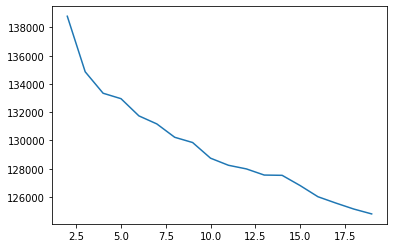

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Preprocess_output.txt',header=None,names=['Post'])
df.dropna(inplace=True)
pos_data=df['Post']
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform(pos_data)
err = []
start_k=2
max_k = 20
for k in range(start_k,max_k):
  km=KMeans(n_clusters=k).fit(X)
  err.append(km.inertia_)
  print(k,km.inertia_)
plt.plot([i for i in range(start_k,max_k)],err)

In [8]:
X

<8973x13590 sparse matrix of type '<class 'numpy.int64'>'
	with 114524 stored elements in Compressed Sparse Row format>

In [9]:
vectorizer.get_feature_names().index('สายพันธุ์')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


9330

In [11]:
df['Post']

0       OPEN !! ยกโล ครึ่งโล ขีด ราคาส่ง พ่อค้า Line  ...
1       OPEN !! เมา รา เหนียว สาบ ยกโล ครึ่งโล ขีด ราค...
2        เมา ควัน กัญชา เเระอิ เหี้ย มึน ขนาด ดม นิดเดียว
3       ศุภ ชัย ใจ สมุทร พรรค ภูมิใจ ตาย ออกมา ขู่ ​" ...
4                             สวัสดี วันลอย กะ ทง ไลน์ ✅✅
                              ...                        
8968                                 มายัง ชิป กัญชา เสรี
8969    สั่ง รป าา  Gorilla Mix  180 🧚‍♂️ Charlote Ang...
8970    ปุ้น สูบ  Delivery 📦📦 เขต กรุงเทพ  ต่างจังหวัด...
8971    พี่ หมี โปร Malibu Pie 200 Blueberry Diesel 21...
8972    Pina Strain ลูกผสม Pluto Auto  Peach OG กลิ่น ...
Name: Post, Length: 8973, dtype: object

In [12]:
k=5
km=KMeans(n_clusters=k).fit(X)
c=km.cluster_centers_

In [13]:
from collections import Counter
Counter(list(km.labels_)).most_common()

[(0, 4174), (1, 3952), (4, 795), (3, 51), (2, 1)]

In [14]:
for i in range(k):
  word_tuples = [(c[i][j],vectorizer.get_feature_names()[j]) for j in range(len(c[i]))]
  word_tuples.sort(reverse=True)
  print(' '.join([str(j) for i,j in word_tuples[:30]]))
                                                           

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


กัญชา เสรี คน สุรา ไทย ขาย กิน ทำ ใส่ เมา เรื่อง เหล้า ประเทศ ดี อนุทิน พรรค กุ อะ เหมือน เด็ก เสพ matichononline ทางการแพทย์ ยา การแพทย์ เหี้ย ร้าน ก้าวหน้า แม่ สูบ
�� ราคา 10 ร้าน ดอก line สั่งซื้อ เมา สั่ง งาน thc grab สนใจ มือ og บริการ ผม ทัก 50 กัญ 100 ไลน์ ฟรี บาท 350 exotic ติดต่อ สินค้า ตัว ชน
กัญชา เสรี ร้าน สุรา งบ ก้าวหน้า กิน �� ไทย ใส่ ประเทศ ทำ ขาย shiroi 👉🏼 ไลน์ แอด สั่งสินค้า สั่ง วิจัย ปี ทางการแพทย์ ตัว ดู กด new menu โพสต์ หวาน ยัน
แน่นอน การันตี 𝕆𝔾𝕋𝕙𝕒𝕚𝕝.🍃🍂 ℙ𝕖𝕥𝕖 แห้ง หอม สายพันธุ์ สั่ง รีบ มดี บ่ ฉํ่า งาน คับ กลิ่น auto ลั่น ผลไม้ ปลูก บ่ม thailand green crack ��𝕐.𝔹𝕒𝕟𝕘 20 10 มวน 800 60 500
ไลน์ สนใจ ขีด แอด line 100 ฟรี มือ ทัก ชน กรัม grab 50 สั่งซื้อ อัด งาน บาท 10 เมา ครึ่ง กรุงเทพ ราคา ต่างจังหวัด เหนียว เชียงใหม่ พันลำ แท่ง จี ค้าบ thc
